### K均值聚类
1. sklearn.cluster.KMeans提供了成熟的聚类分析算法
2. 常用构造参数：
```
class sklearn.cluster.KMeans(n_clusters=8,   # 簇数量
                            init=’k-means++’, # KMeans算法{‘k-means++’, ‘random’}
                            n_init=10,      # 程序基于不同的随机点独立运行的次数
                            max_iter=300,   # 最大迭代次数
                            random_state=None)
```
3. 常用方法：
    1. `fit(X)`, 对X进行聚类训练， shape=(n_samples, n_features)
    2. `predict(X)`，使用训练的模型对X进行聚类
4. 常用属性：
    1. `cluster_centers`, 簇中心值

### 作业1

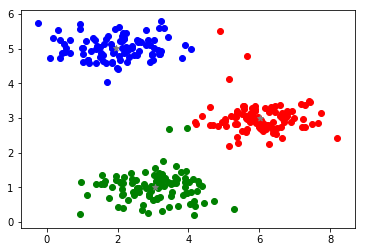

In [23]:
from sklearn.cluster import KMeans
from scipy import io as sio
from matplotlib import pyplot as plt
%matplotlib inline

K = 3
colors = ['red', 'green', 'blue', 'blank']
km = KMeans(n_clusters=K, init='random', n_init=10, max_iter=300, random_state=0)
X = sio.loadmat('ex7data2.mat')['X']
km.fit(X)
kind = km.predict(X)
for i,x in enumerate(X):
    plt.scatter(x[0], x[1], color=colors[kind[i]])
centers = km.cluster_centers_
for c in centers:
    plt.scatter(c[0], c[1], color='gray', marker='*')

### 作业2：使用KMeans进行图像压缩
1. `bird_small.png`包含了上万种颜色，通过聚类，用16种颜色来表示

In [7]:
from numpy import random
def initialize_random_centroids(X, K):
    return random.permutation(X[:K])

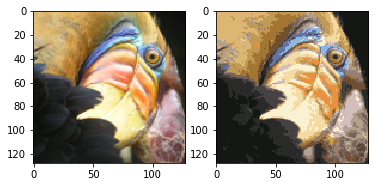

In [21]:
from matplotlib import image
fig,ax = plt.subplots(1,2)
ax1,ax2 = ax

img = image.imread('./bird_small.png')
ax1.imshow(img)
imgsize = img.shape
img = img.reshape((imgsize[0]*imgsize[1],3))

# KMeans Config
K = 16
max_iter = 10
km = KMeans(n_clusters=K, init='random', n_init=10, max_iter=300, random_state=0)
km.fit(img)
kind = km.predict(img)
centers = km.cluster_centers_
img_recover = centers[kind,:]
img_recover = img_recover.reshape((imgsize[0],imgsize[1],3))
ax2.imshow(img_recover)


# PCA

### 作业1：数据降维展示

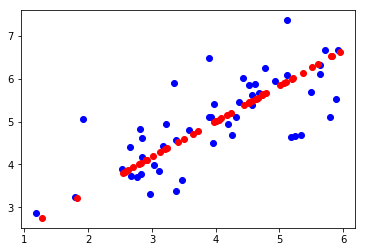

In [34]:
from scipy import io as sio
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
X = sio.loadmat('ex7data1.mat')['X']
plt.plot(X[:,0], X[:,1], 'bo')

K = 1
pca = PCA(n_components=1)
X_reduce = pca.fit_transform(X)
X_rec = pca.inverse_transform(X_reduce)
plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro')

从上图可以看到，当我们将数据降至一维时在还原时，我们的数据已经近似直线排列（红）

### 作业2：数据压缩

In [40]:
from matplotlib import pyplot as plt
import numpy as np

def displayData(X, width):
    m,n = X.shape
    hight = m // width
    piex = int(np.sqrt(n))
    
    cur = 0
    img = np.ones((width*piex + width+1,
                   hight*piex + hight+1))

    for i in range(hight):
        for j in range(width):
            x = (i+1)+(i)*piex-1
            y = (j+1)+(j)*piex-1
            img[x:x+piex,y:y+piex] = X[cur].reshape((piex,piex)) / X[cur].max()
            cur += 1
    return plt.imshow(img.T, cmap='gray')

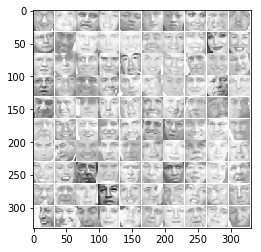

In [41]:
from scipy import io as sio
from matplotlib import pyplot as plt
X = sio.loadmat('ex7faces.mat')['X']
img = displayData(X[:100], 10)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_reduce = pca.fit_transform(X)

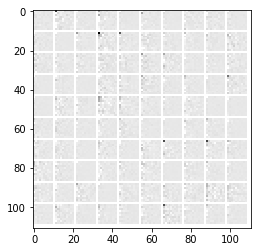

In [46]:
displayData(X_reduce[:100,:], 10)

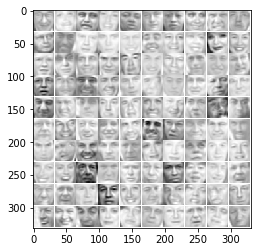

In [47]:
X_rec  = pca.inverse_transform(X_reduce)
displayData(X_rec[:100,:], 10)